In [128]:
# Following this K Means video
# https://www.youtube.com/watch?v=iNlZ3IU5Ffw&t=176s&ab_channel=AndyMcDonald
# my comment
import numpy as np
import seaborn as sns

# Libraries
import pandas as pd               # Read from .csv
import matplotlib.pyplot as plt   # Display results

# Modules
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [129]:
# Read in the dataset
dataset = pd.read_csv('/Users/joshuamarquez/anaconda_projects/2025_Summer_Research/Data Files/digital_behavior.csv')
dataset

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7
...,...,...,...,...,...,...,...,...,...
495,392.3,58,6.0,114,99.0,6.1,8.3,10.0,42.4
496,297.8,56,6.8,47,148.8,7.5,9.1,10.0,50.4
497,348.6,42,6.1,97,111.4,7.8,10.0,10.0,49.5
498,307.5,33,7.2,67,134.6,8.0,9.3,4.0,71.6


In [130]:
# Drop any rows with NA (non-existent values)
df.dropna(inplace = True)
df

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7
...,...,...,...,...,...,...,...,...,...
495,392.3,58,6.0,114,99.0,6.1,8.3,10.0,42.4
496,297.8,56,6.8,47,148.8,7.5,9.1,10.0,50.4
497,348.6,42,6.1,97,111.4,7.8,10.0,10.0,49.5
498,307.5,33,7.2,67,134.6,8.0,9.3,4.0,71.6


In [131]:
# Check if any duplicates in the dataset
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [132]:
# Drop any existing duplicates
dataset.drop_duplicates()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7
...,...,...,...,...,...,...,...,...,...
495,392.3,58,6.0,114,99.0,6.1,8.3,10.0,42.4
496,297.8,56,6.8,47,148.8,7.5,9.1,10.0,50.4
497,348.6,42,6.1,97,111.4,7.8,10.0,10.0,49.5
498,307.5,33,7.2,67,134.6,8.0,9.3,4.0,71.6


In [141]:
# Dataset has been cleaned, move on to clustering
# Slice the data into our two columns
# index 0 -> daily_screen_time_min
# index 1 -> sleep_hours

x = x = dataset[['social_media_time_min', 'sleep_hours']].values
x

array([[133.2,   5.9],
       [109.5,   7.2],
       [ 84.7,   8. ],
       [ 88.9,   6.5],
       [ 78.8,   6.9],
       [ 82.6,   8.5],
       [117. ,   6.8],
       [ 87.8,   9.6],
       [150.7,   7.2],
       [186.9,   4.4],
       [ 93.9,   7.4],
       [130.8,   7. ],
       [142.5,   8. ],
       [141.2,   7.3],
       [123.4,   6.3],
       [153.4,   5. ],
       [141.7,   6.2],
       [ 64.3,   5.5],
       [159.1,   5.8],
       [159.9,   7.2],
       [ 85.7,   8.5],
       [121.7,   7. ],
       [150.7,   5.1],
       [110.6,   7. ],
       [168.3,   7.9],
       [226.4,   5.8],
       [ 84.6,   6.3],
       [ 57.9,   6.5],
       [133.7,   5.6],
       [152.5,   7.3],
       [109.6,   6.4],
       [185.4,   7. ],
       [ 59.8,   5.4],
       [151.2,   6. ],
       [ 92.7,   7.4],
       [197.4,   6.1],
       [209.7,   8.6],
       [ 85.5,   6. ],
       [ 95.3,   6.8],
       [158.7,   7.6],
       [102.6,   4.8],
       [118. ,   4.4],
       [121.1,   4.7],
       [ 33

In [142]:
# Elbow method to find ideal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [143]:
# Output wcss
wcss

[958423.4349999999,
 340638.8659584155,
 193331.98957207927,
 108388.08399166944,
 78861.78708731662,
 58076.76622914593,
 41163.8715218728,
 32055.428706672923,
 24689.142133457703,
 20104.763963367324]

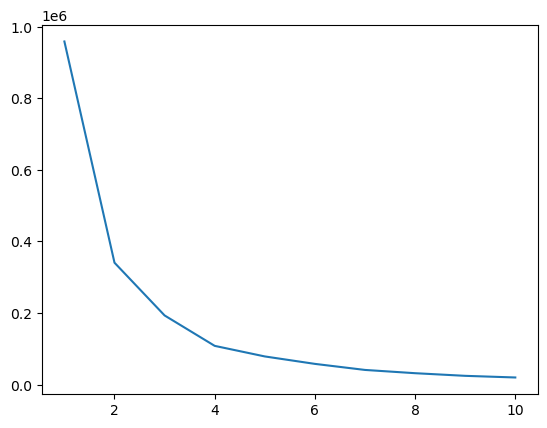

In [144]:
# Check Elbow Method graph
plt.plot(range(1, 11), wcss)

In [145]:
# 3 is the ideal number of clusters

In [146]:
# Output cluster assigned to each datum
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_means = kmeans.fit_predict(x)
y_means

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1,
       1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0,
       1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2,
       1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2,
       0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0,

In [147]:
# Concatenate cluster numbers to our original dataset
pd.concat([dataset, pd.DataFrame(y_means)], axis = 1)

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score,0
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8,0
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6,0
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6,1
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4,1
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7,1
...,...,...,...,...,...,...,...,...,...,...
495,392.3,58,6.0,114,99.0,6.1,8.3,10.0,42.4,1
496,297.8,56,6.8,47,148.8,7.5,9.1,10.0,50.4,0
497,348.6,42,6.1,97,111.4,7.8,10.0,10.0,49.5,0
498,307.5,33,7.2,67,134.6,8.0,9.3,4.0,71.6,0


Text(0, 0.5, 'Sleep (hours)')

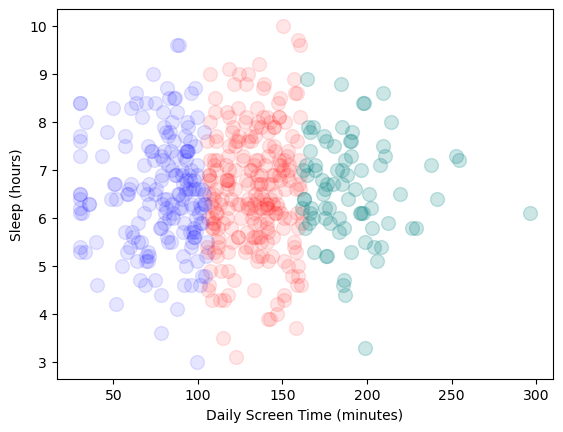

In [148]:
# Create a scatterplot

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', alpha = 0.1)
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'blue', alpha = 0.1)
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'teal', alpha = 0.2)
plt.xlabel('Daily Screen Time (minutes)')
plt.ylabel('Sleep (hours)')